Sample A: mean = 3.4995195277967546 var = 0.4995434529517402
Sample B: mean = 4.499107947810698 var = 0.04080455254484474


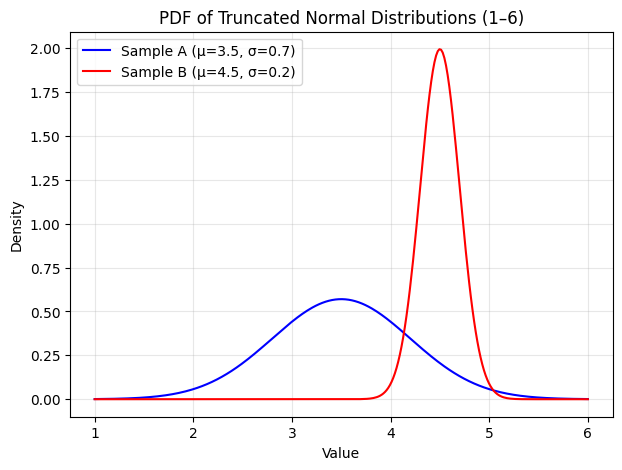

t-statistique = -52.6659678196102
p-valeur = 0.0


<Figure size 600x600 with 0 Axes>

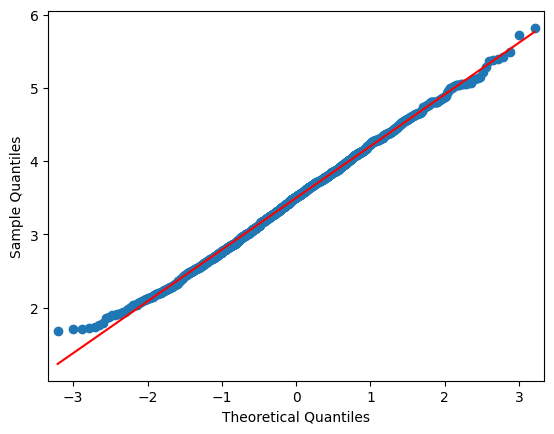

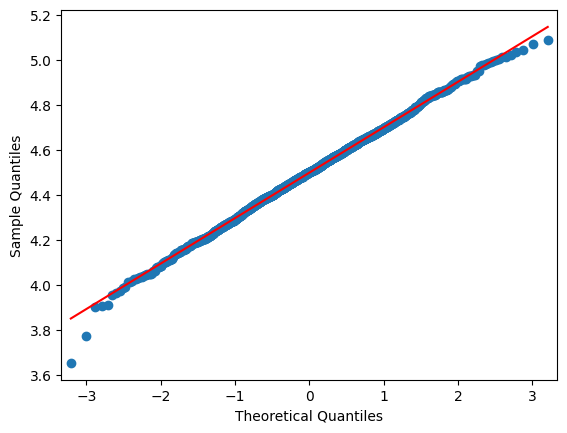

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm, ttest_ind
import statsmodels.api as sm


# --- Function to generate truncated normal sample ---
def normal_tronquee(n, mu, sigma, min_val, max_val):
    a, b = (min_val - mu) / sigma, (max_val - mu) / sigma
    return truncnorm.rvs(a, b, loc=mu, scale=sigma, size=n)

# --- Parameters ---
np.random.seed(42)
n = 100
mu_A, sigma_A = 3.5, 0.7   # Sample A : mean=3.5, low variance
mu_B, sigma_B = 4.5, 0.2   # Sample B : mean=4.5, higher variance
min_val, max_val = 1, 6

# --- Generate samples ---
notes_A = normal_tronquee(n, mu_A, sigma_A, min_val, max_val)
notes_B = normal_tronquee(n, mu_B, sigma_B, min_val, max_val)

print("Sample A: mean =", notes_A.mean(), "var =", notes_A.var(ddof=1))
print("Sample B: mean =", notes_B.mean(), "var =", notes_B.var(ddof=1))

# --- PDF Plot ---
x = np.linspace(min_val, max_val, 300)
pdf_A = truncnorm.pdf(x, (min_val-mu_A)/sigma_A, (max_val-mu_A)/sigma_A, loc=mu_A, scale=sigma_A)
pdf_B = truncnorm.pdf(x, (min_val-mu_B)/sigma_B, (max_val-mu_B)/sigma_B, loc=mu_B, scale=sigma_B)

plt.figure(figsize=(7,5))
plt.plot(x, pdf_A, label=f"Sample A (μ={mu_A}, σ={sigma_A})", color="blue")
plt.plot(x, pdf_B, label=f"Sample B (μ={mu_B}, σ={sigma_B})", color="red")
plt.title("PDF of Truncated Normal Distributions (1–6)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- QQ-plot comparing the two samples ---
plt.figure(figsize=(6,6))
sorted_A = np.sort(notes_A)
sorted_B = np.sort(notes_B)
figA=sm.qqplot(sorted_A, line='s')
figB=sm.qqplot(sorted_B, line='s')


# --- Welch t-test ---
t_stat, p_val = ttest_ind(notes_A, notes_B, equal_var=False)

print("t-statistique =", t_stat)
print("p-valeur =", p_val)

